In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
df = pd.read_csv('../ML471_S2_Datafile_Concept(in).csv')

c:\Users\madha\PycharmProjects\NLP-ML\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\madha\PycharmProjects\NLP-ML\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\madha\PycharmProjects\NLP-ML\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\madha\PycharmProjects\NLP-ML\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


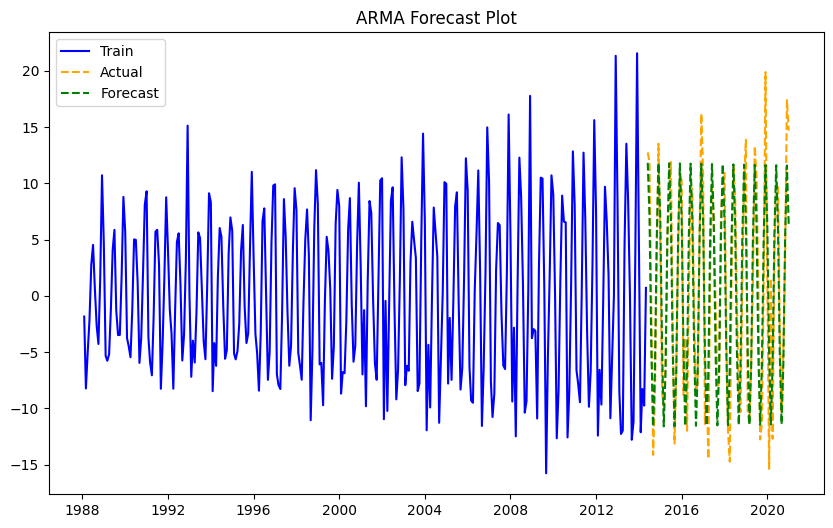

In [ ]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df = df.dropna(subset=['Power_Consumption_diff']).set_index('Datetime')

train_size = int(len(df) * 0.8)
train, test = df['Power_Consumption_diff'][:train_size], df['Power_Consumption_diff'][train_size:]

model = ARIMA(train, order=(2, 0, 2))
model_fit = model.fit()

forecast = model_fit.forecast(steps=len(test))

plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Train', color='blue')
plt.plot(test.index, test, label='Actual', color='orange', linestyle='--')
plt.plot(test.index, forecast, label='Forecast', color='green', linestyle='--')
plt.title('ARMA Forecast Plot')
plt.legend()
plt.show()

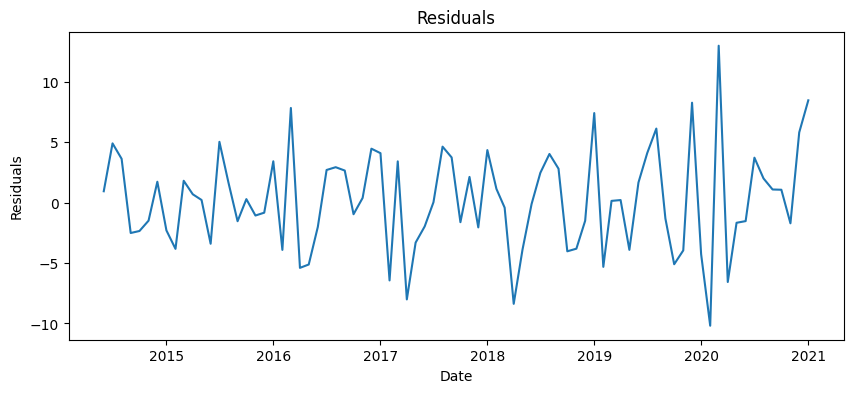

In [ ]:
residuals = test - forecast

plt.figure(figsize=(10, 4))
plt.plot(test.index, residuals)
plt.title('Residuals')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()